In [ ]:
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

# Save data to a NumPy file
np.savez('mnist_dataset.npz', train_images=train_images, train_labels=train_labels, test_images=test_images, test_labels=test_labels)


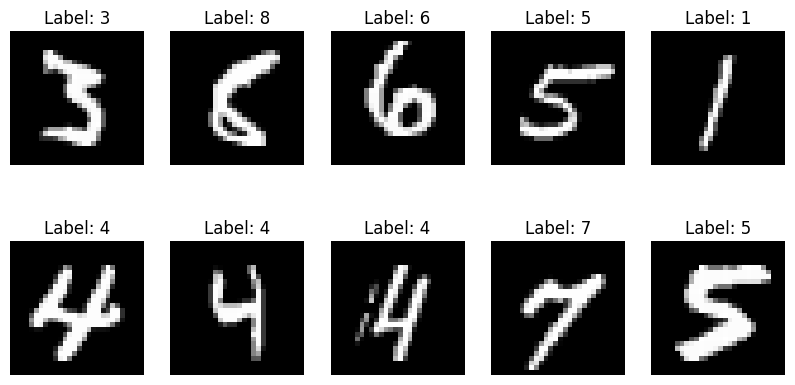

In [ ]:
import matplotlib.pyplot as plt
# Display a few random images from the training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    random_index = np.random.randint(0, len(train_images))
    plt.imshow(train_images[random_index], cmap='gray')
    plt.title(f"Label: {train_labels[random_index]}")
    plt.axis('off')

plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (digits 0 through 9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the images to (num_samples, height, width, channels)
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model for later use
model.save('digit_recognition_model.h5')


Epoch 1/5
1875/1875 [==============================] - 47s 24ms/step - loss: 0.1519 - accuracy: 0.9549 - val_loss: 0.0608 - val_accuracy: 0.9799
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0496 - accuracy: 0.9851 - val_loss: 0.0471 - val_accuracy: 0.9836
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0380 - val_accuracy: 0.9871
Epoch 4/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0219 - accuracy: 0.9927 - val_loss: 0.0446 - val_accuracy: 0.9857
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0492 - accuracy: 0.9853
Test accuracy: 0.9853000044822693


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# convert the model to TensorFLow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to a file
with open('Digit_recognation.tflite', 'wb') as f:
  f.write(tflite_model)